# Programming for Data Science and Artificial Intelligence

## Pre-Workshop - Life Expectancy

In this workshop we will be working on a dataset called the Life Expectancy dataset.

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Our tasks will be divided into 2 parts

1. Exploratory Data Analysis
    * Load and view the Dataset
    * Are there any null values ? How will you wrangle/handle them?
    * Are there any outliers values ? How will you wrangle/handle them?
    * Do you notice any patterns or anomalies in the data? Can you plot them?
2. Data Analysis using Machine Learning
    * Training a machine learning model for Life Expectancy prediction

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 1. Exploratory Data Analysis

### Importing Data

In [2]:
df = pd.read_csv('/data/Life_Expectancy_Data.csv')

# print the first rows of data
# Your code here


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Check the shape of your data
# Your code here



(2938, 22)

In [4]:
# Statistical info Hint: look up .describe()
# Your code here


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Datatypes of Attributes

In [5]:
# Check Dtypes of your input data
# Your code here


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Column names

In [6]:
# Check the column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Now we would like to alter the following column names

from " BMI " to "BMI" <br>
from "Life expectancy " to "Life_expectancy" <br>
from "Adult Mortality" to "Adult_mortality" <br>
from "infant deaths" to "Infant_deaths" <br>
from "percentage expenditure" to "Percentage_expenditure" <br>
from "Hepatitis B" to "HepatitisB" <br>
from "Measles " to "Measles" <br>
from "under-five deaths " to "Under_five_deaths" <br>
from "Total expenditure" to "Total_expenditure" <br>
from "Diphtheria " to "Diphtheria" <br>
from " thinness  1-19 years" to "Thinness_1-19_years" <br>
from " thinness 5-9 years" to "Thinness_5-9_years" <br>
from " HIV/AIDS" to "HIV/AIDS" <br>
from "Income composition of resources" to "Income_composition_of_resources" <br>


In [7]:
# Fixing column names Hint: .rename()
# Your code here
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [8]:
# Notice that the column names changed
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [9]:
# Check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Country', 'Status']

In [10]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

Country                             193
Year                                 16
Status                                2
Life_expectancy                     363
Adult_mortality                     426
Infant_deaths                       209
Alcohol                            1077
Percentage_expenditure             2328
HepatitisB                           88
Measles                             958
BMI                                 609
Under_five_deaths                   252
Polio                                74
Total_expenditure                   819
Diphtheria                           82
HIV/AIDS                            200
GDP                                2491
Population                         2279
Thinness_1-19_years                 201
Thinness_5-9_years                  208
Income_composition_of_resources     626
Schooling                           174
dtype: int64

In [11]:
df1 = df.drop(["Life_expectancy"], axis=1)

categorical = df1.select_dtypes(include= "O")
numerical = df1.select_dtypes(exclude= "O")

In [12]:
categorical

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


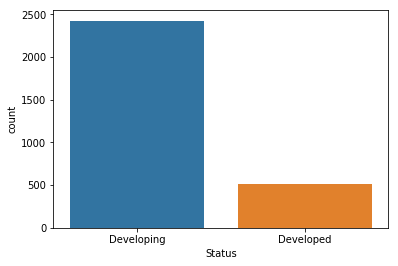

In [13]:
# Let's see how many developing and developed countries there are
# Your code here 
# Hint: checkout sns.countplot()


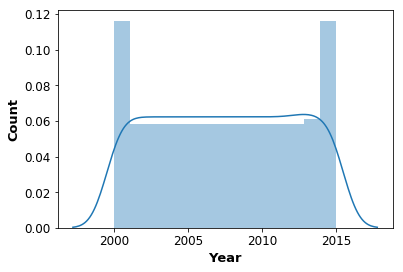

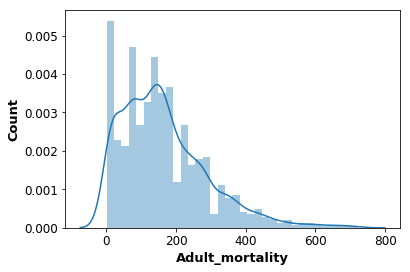

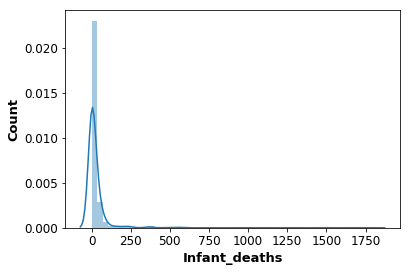

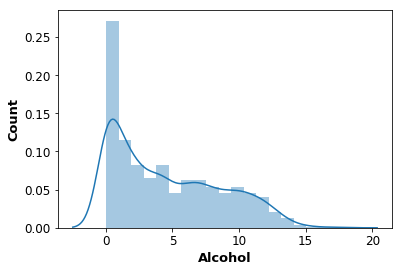

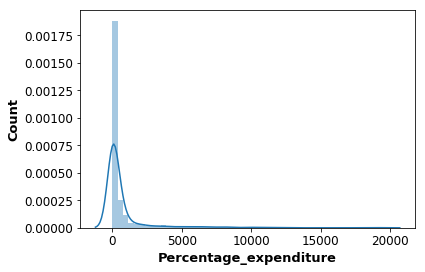

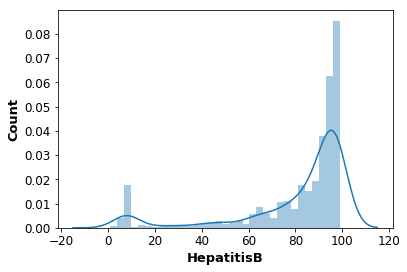

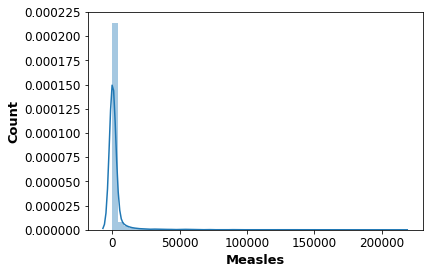

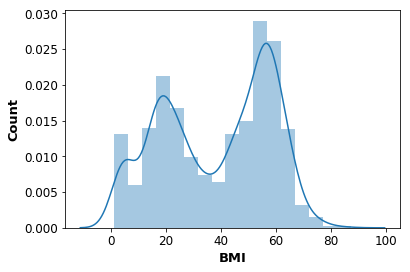

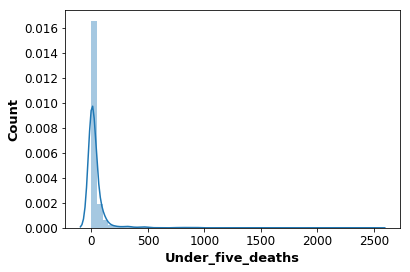

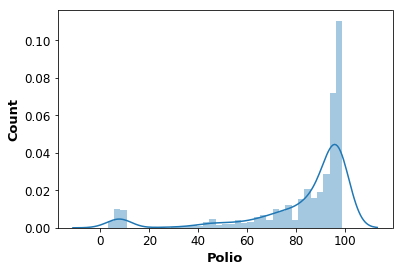

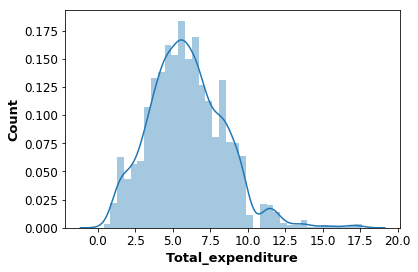

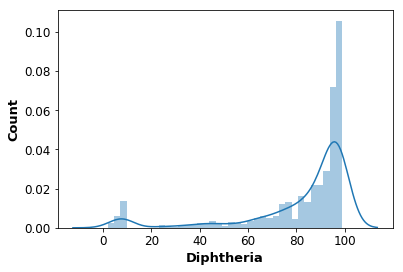

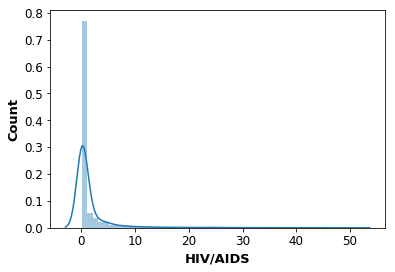

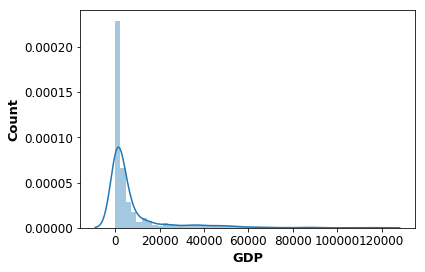

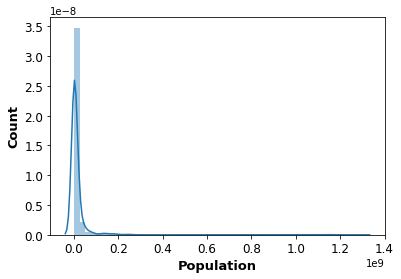

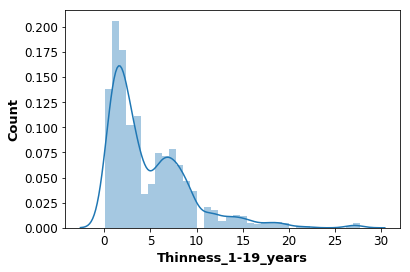

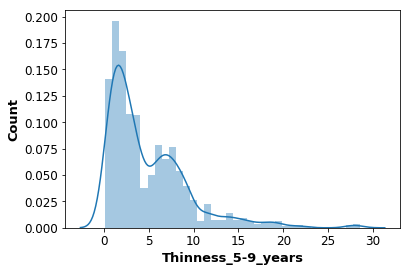

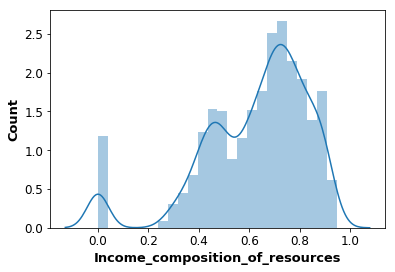

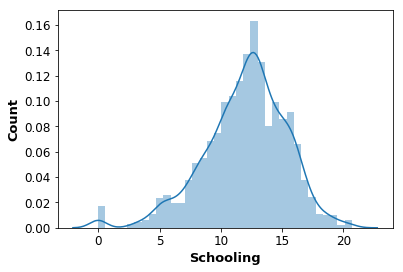

In [14]:
# Let's plot all columns with numberical data using displot
# Your code here


Text(0.5,0,'Life Expectancy')

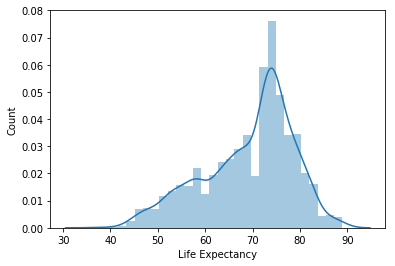

In [15]:
# What about a displot for "Life Expectancy"?
# Your code here


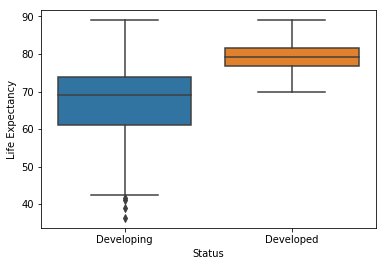

In [16]:
# Let's try bar plot on "Status"
# Your code here


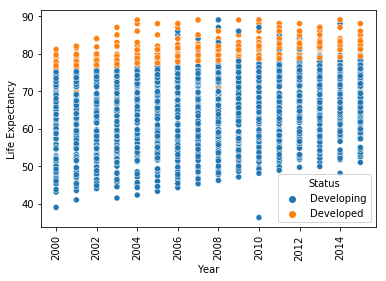

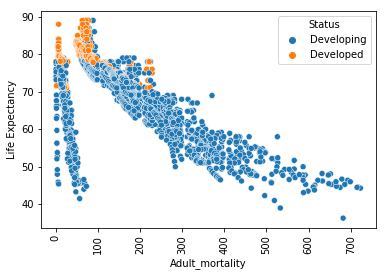

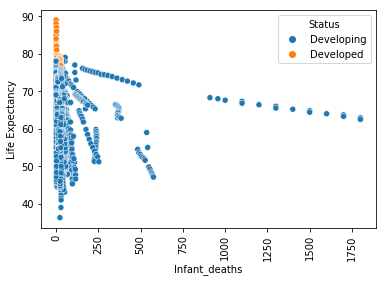

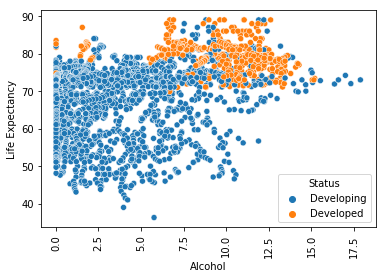

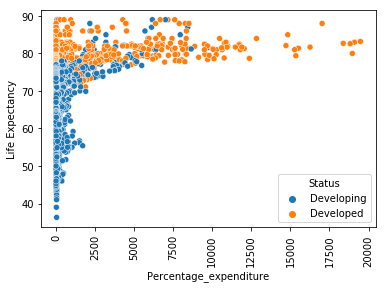

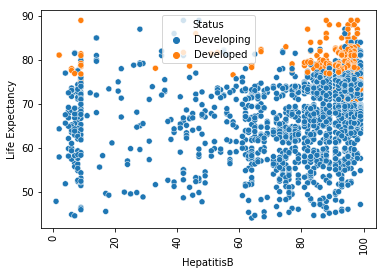

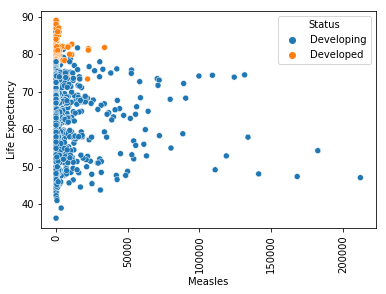

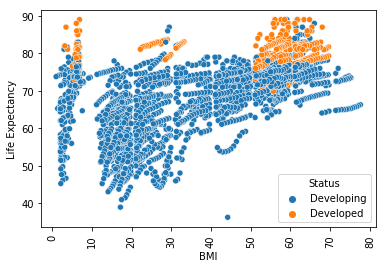

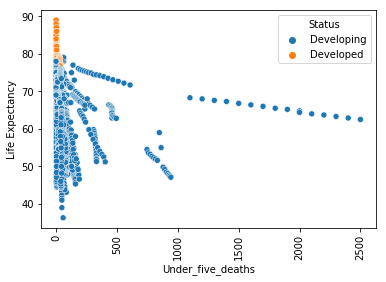

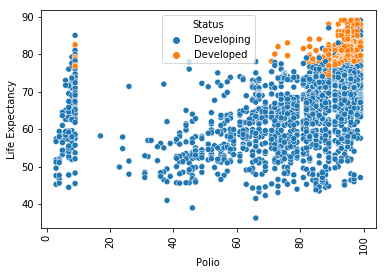

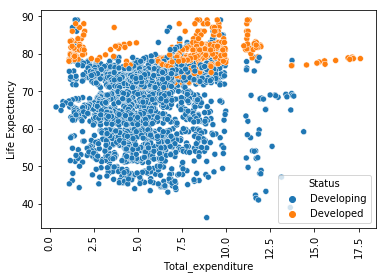

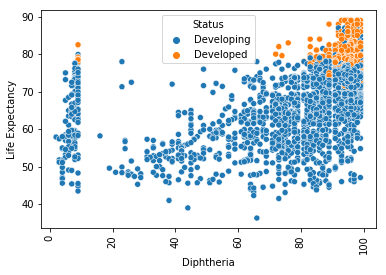

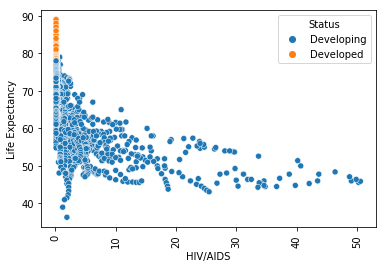

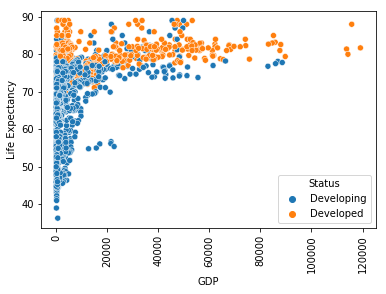

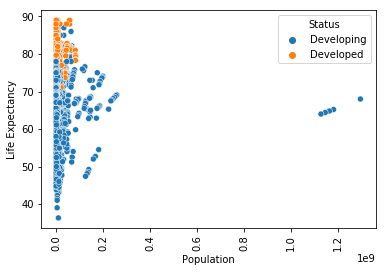

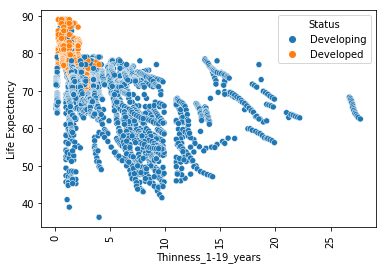

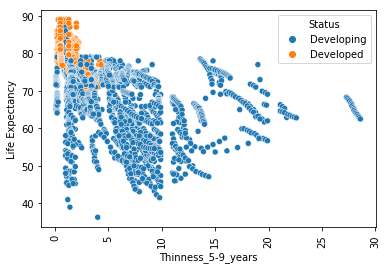

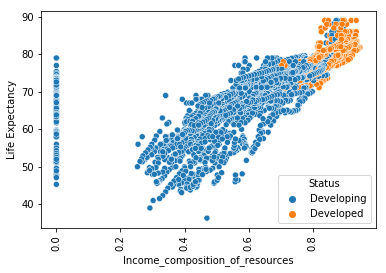

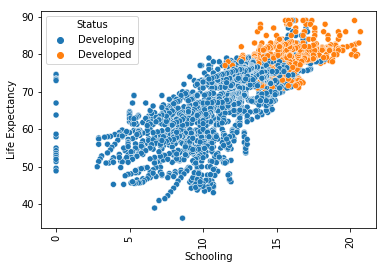

In [17]:
# And scatterplot of all columns of developing vs developed countries
# Make sure to use different colours to indicate the statuses
# Your code here


In [18]:
# Let's drop "Year", "Country" and "Satus". Return a copy called life_numeric_data
# Your code here 
# Hint: .drop()


In [19]:
life_numeric_data

,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Dealing with Outliers

In [20]:
# Write a function to count and calculate the percentage of the outliers, 
# calculate the 25%, 75% and inter quatile 
# so that you can find the min and max values
# and so that you can "count" how many values that are less than min value or more than max values
# and so that you can calculate the percentage of the outlier

def outlier_count(col, data = df):
    
    print("\n"+15*'-' + col + 15*'-'+"\n")
    
    # calculate your 25% quatile and 75% quatile
    # Your code here
    
    
    # calculate your inter quatile
    # Your code here
    
    
    # min_val and max_val are calculated for you
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    # Your code here
    
    
    # calculate the percentage of the outliers
    # Your code here
    
    
    
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [21]:
cont_vars = list(life_numeric_data)
for col in cont_vars:
    outlier_count(col)


---------------Life_expectancy---------------

Number of outliers: 0
Percent of data that is outlier: 0.0%

---------------Adult_mortality---------------

Number of outliers: 0
Percent of data that is outlier: 0.0%

---------------Infant_deaths---------------

Number of outliers: 315
Percent of data that is outlier: 10.72%

---------------Alcohol---------------

Number of outliers: 0
Percent of data that is outlier: 0.0%

---------------Percentage_expenditure---------------

Number of outliers: 389
Percent of data that is outlier: 13.24%

---------------HepatitisB---------------

Number of outliers: 0
Percent of data that is outlier: 0.0%

---------------Measles---------------

Number of outliers: 542
Percent of data that is outlier: 18.45%

---------------BMI---------------

Number of outliers: 0
Percent of data that is outlier: 0.0%

---------------Under_five_deaths---------------

Number of outliers: 394
Percent of data that is outlier: 13.41%

---------------Polio---------------



### Check for null values

In [22]:
# Write a function to check the missing values
def checkna(df):
    missing_values = df.isna().sum().reset_index() # reset index
    missing_values.columns = ["Features", "Missing_Values"] # create columns
    
    # Calcualte "Missing_Percent"
    # Your code here
    
    
    return missing_values[missing_values.Missing_Values > 0 ]

In [23]:
checkna(df)

,Features,Missing_Values,Missing_Percent
3,Life_expectancy,10,0.34
4,Adult_mortality,10,0.34
6,Alcohol,194,6.60
8,HepatitisB,553,18.82
10,BMI,34,1.16
12,Polio,19,0.65
13,Total_expenditure,226,7.69
14,Diphtheria,19,0.65
16,GDP,448,15.25
17,Population,652,22.19


### Let's fill these null values
To do so, there are many methods e.g. fill with mode, fill with median and fill with mean

##### Imputer

* Univariate feature imputation.
* The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided   constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located.

In [24]:
# Write a function that is able to fill a dataframe of a specified feature with a specific method

def imputer(df, feature, method):
    if method == "mode":
        # Fill with mode
        # Your code here
        
        
    elif method == "median":
        # Fill with median
        # Your code here
        

    else:
        # Fill with mean
        # Your code here
        

In [25]:
features_missing= df.columns[df.isna().any()]
for feature in features_missing:
    imputer(df, feature= feature, method= "mean")

In [26]:
df["Life_expectancy"].fillna( df["Life_expectancy"].median(), inplace=True)

In [27]:
# No more Null values! yay!
checkna(df)

,Features,Missing_Values,Missing_Percent


### Correlation Matrix

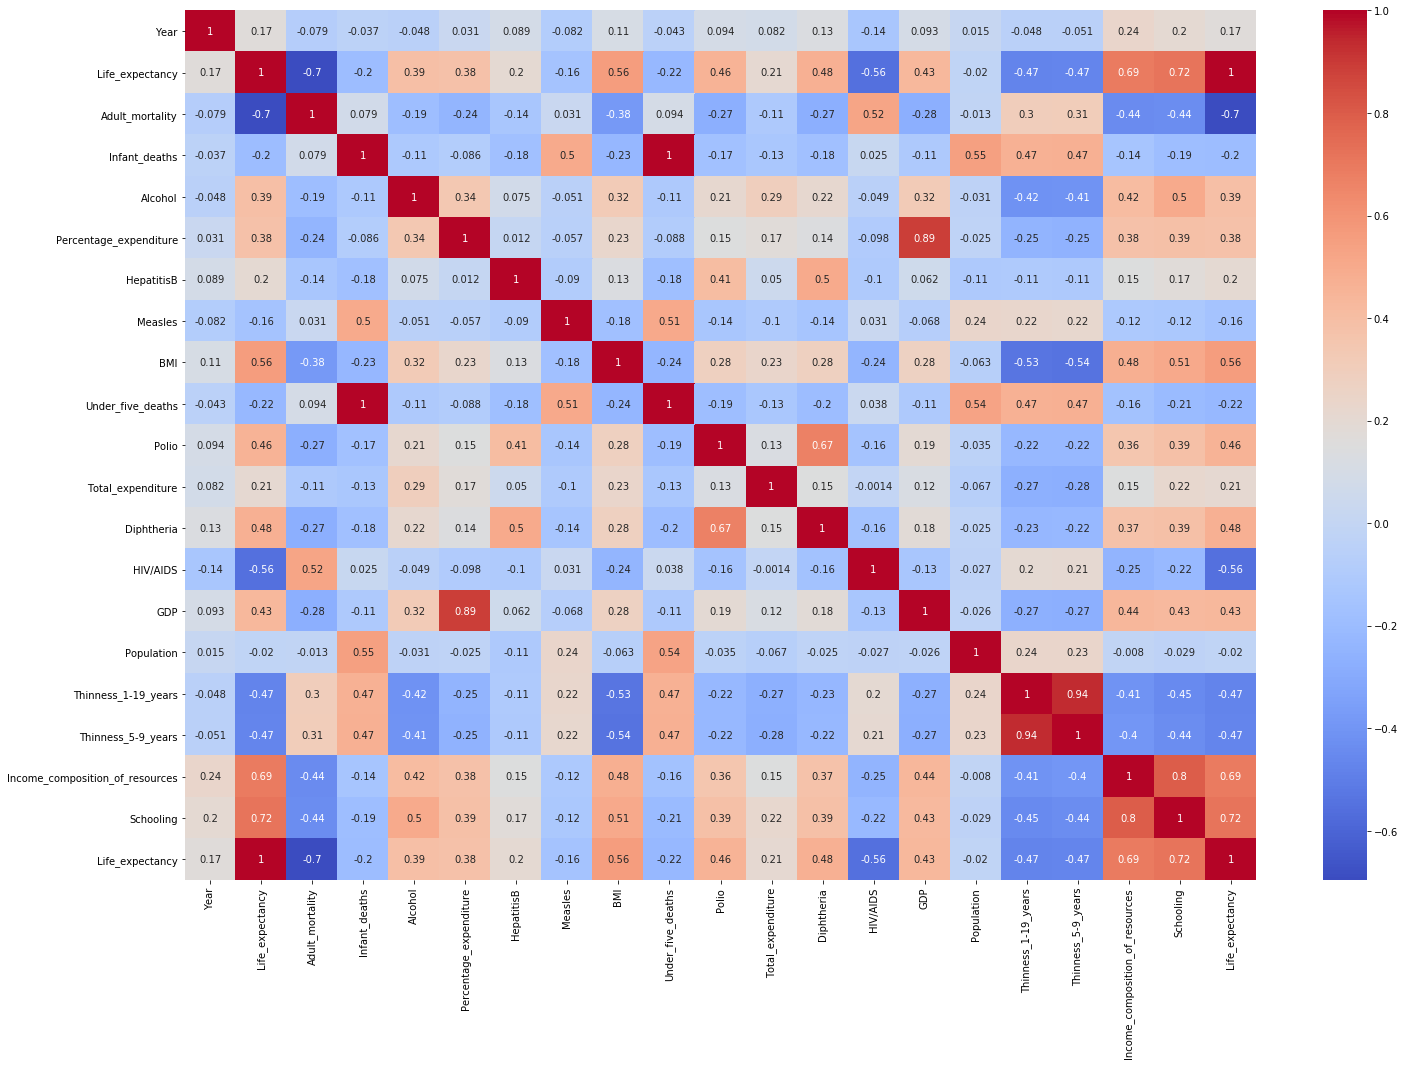

In [28]:
# Let's check out heatmap
# Your code here.
# Hint sns.heatmap()


### Label Encoding
Now we would like to change "Developing" and "Developed" to "0" and "1"  <br>
Check out on how to do : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#:~:text=LabelEncoder%20can%20be%20used%20to%20normalize%20labels.&text=It%20can%20also%20be%20used,and%20comparable)%20to%20numerical%20labels.

In [29]:
from sklearn.preprocessing import LabelEncoder
# Your code here


In [30]:
print('Unique df["Status"]: ', df["Status"].unique())
df["Status"]

Unique df["Status"]:  [1 0]


0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2938, dtype: int64

### Now, you have your X and y

In [31]:
X = df.drop(['Country', 'Year', 'Infant_deaths', 'Life_expectancy'],1)
y = df["Life_expectancy"]

## 2. Data Analysis using Machine Learning

### Train Test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [33]:
# Let's check shapes of all X_train, X_test, y_train, y_test
# Your code here


Shape of X_train:  (2203, 18)
Shape of X_test:  (735, 18)
Shape of y_train:  (2203,)
Shape of y_test:  (735,)


### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
# Your code here


### Modelings

In [35]:
# Write a Function called predictive_models() to apply Regression algorithms and return the results of models
# The ML models that we will use include the folloiwngs imported libraries:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predictive_models():
    # models that we will be using, put them in a list
    algorithms = [SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0)]
    # The names of the models
    algorithm_names = ["SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    
    # Create 3 lists which we will be appending values caluclated during training to
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    # Create 3 lists which we will be appending values caluclated during testing to
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        
        # fit your model
        # Your code here
        # Hint: model.fit()

        
        # Predict your model, one for X_test and one for X_train
        # Your code here
        # Hint: model.predict()

        
        # Calculate mean square error and mean absolute error of traing data
        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)
        
        # Calculate mean square error and mean absolute error of testing data
        # Your code here

        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
                
        # Appending the Errors into the list for testing data
        # Your code here

        
    # Creating DataFrame for Logs of Models and their errors    
    results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing})

    return results

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
# Write your results of training different machine learning models
# Your code here


,Models,Mean Squared Error Training,Mean Absolute Error Training,Mean Squared Error Testing,Mean Absolute Error Testing
0,SVR,12.4784,2.3607,11.7216,2.3593
1,KNeighbors Regressor,5.4613,1.5619,7.5779,1.9157
2,Decision-Tree Regressor,0.0000,0.0000,8.7351,1.8137
3,Random-Forest Regressor,0.5510,0.4642,3.1936,1.1540


### Grid Search to find the best estimator of the model

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

# Perform GridSearchCV define cv = 5
# Your code here


# Fit your grid_search
# Your code here
# Hint: .fit()
grid_search.fit(X_train, y_train);

# Find your grid_search's best score
# Your code here



# Find your grid_search's best param
# Your code here



print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 94.82 %
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}
